In [1]:
# Import library NumPy untuk operasi array
import numpy as np

# Import library ImageIO untuk membaca dan menulis gambar
import imageio

# Import library Matplotlib untuk plotting
import matplotlib.pyplot as plt


Membaca Gambar

In [2]:
img = imageio.imread("foto.jpg")      #Membaca gambar dan menyimpannya ke variabel img menggunakan modul imageio

C:\Users\Haekala\AppData\Local\Temp\ipykernel_6668\3956147704.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("foto.jpg")      #Membaca gambar dan menyimpannya ke variabel img menggunakan modul imageio


In [3]:
img_height = img.shape[0] #Mendapatkan tinggi gambar (jumlah piksel dalam dimensi vertikal) dan menyimpannya ke variabel img_height
img_width = img.shape[1] #Mendapatkan lebar gambar (jumlah piksel dalam dimensi horizontal) dan menyimpannya ke variabel img_width
img_channel = img.shape[2] #Mendapatkan jumlah saluran warna pada gambar dan menyimpannya ke variabel img_channel

**Inversi**

Membuat variabel img_inversi

In [4]:
# Buat matriks dengan ukuran yang sama dengan matriks gambar yang sedang diolah, dengan tipe data unsigned integer 8-bit
img_inversi = np.zeros(img.shape, dtype=np.uint8)


Membuat fungsi untuk inversi grayscale

In [5]:
def inversi_grayscale(nilai):
    # Looping untuk setiap piksel pada gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            # Ambil nilai komponen warna (R, G, B) dari piksel
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]

            # Hitung nilai grayscale dari piksel
            gray = (int(red) + int(green) + int(blue)) / 3

            # Lakukan inversi grayscale
            gray = nilai - gray

            # Simpan nilai inversi grayscale pada matriks img_inversi
            img_inversi[y][x] = (gray, gray, gray)


Membuat fungsi untuk inversi rgb

In [6]:
def inversi_rgb(nilai):
    # Looping untuk setiap piksel pada gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            # Ambil nilai komponen warna (R, G, B) dari piksel
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]

            # Lakukan inversi pada masing-masing komponen warna
            red = nilai - red
            green = nilai - green
            blue = nilai - blue

            # Simpan nilai inversi pada matriks img_inversi
            img_inversi[y][x] = (red, green, blue)


Menampilkan hasil inversi

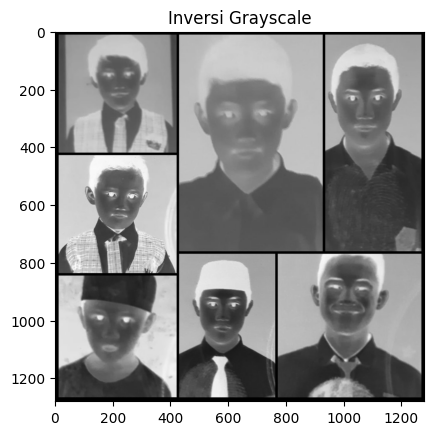

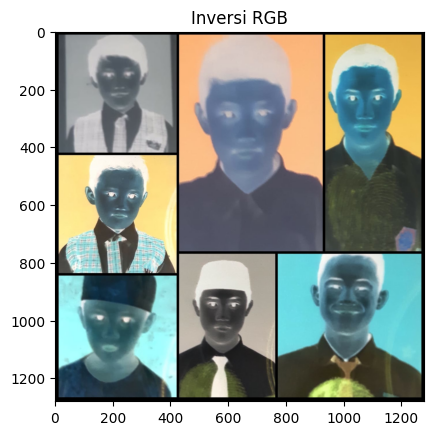

In [7]:
# Panggil fungsi inversi_grayscale dengan nilai maksimum 255
inversi_grayscale(255)

# Tampilkan gambar hasil inversi grayscale menggunakan matplotlib
plt.imshow(img_inversi)
plt.title("Inversi Grayscale")
plt.show()

# Panggil fungsi inversi_rgb dengan nilai maksimum 255
inversi_rgb(255)

# Tampilkan gambar hasil inversi RGB menggunakan matplotlib
plt.imshow(img_inversi)
plt.title("Inversi RGB")
plt.show()


# LOG

Membuat variabel img_log untuk menampung hasil

In [8]:
# Buat matriks kosong dengan ukuran yang sama dengan gambar asli
img_log = np.zeros(img.shape, dtype=np.uint8)

Mendefinisikan fungsi untuk log

In [9]:
def log(c):
    # Looping sepanjang tinggi citra (y) dan lebar citra (x)
    for y in range(0, img_height):
        for x in range(0, img_width):
            # Ambil nilai intensitas dari setiap komponen warna pada titik (x, y)
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            # Hitung nilai rata-rata intensitas keabuan dari ketiga komponen warna
            gray = (int(red) + int(green) + int(blue)) / 3
            # Terapkan transformasi logaritmik pada nilai keabuan
            gray = int(c * np.log(gray + 1))
            # Batasi nilai keabuan agar tidak melebihi rentang 0-255
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
            # Masukkan nilai keabuan yang telah diolah ke dalam matriks citra yang baru
            img_log[y][x] = (gray, gray, gray)


Menampilkan hasil log

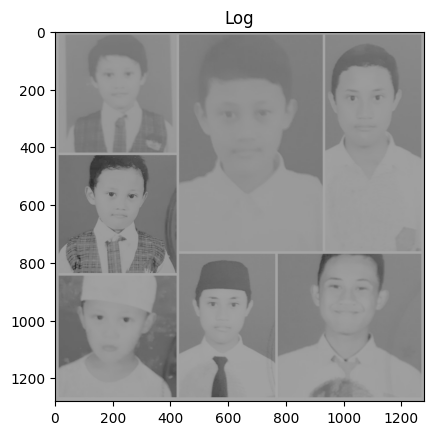

In [10]:
log(30)
plt.imshow(img_log) # Baris ini menggunakan fungsi imshow() dari pustaka Matplotlib untuk menampilkan gambar atau array dalam plot.
plt.title("Log") # Baris ini menambahkan judul pada plot yang akan ditampilkan dengan menggunakan fungsi title() dari pustaka Matplotlib.
plt.show() #Baris ini menampilkan plot yang telah dibuat dengan menggunakan fungsi show() dari pustaka Matplotlib.

# Inversi & Log

Membuat variabel img_inlog untuk menampung hasil

In [11]:
img_inlog = np.zeros(img.shape, dtype=np.uint8) #Baris ini membuat array numpy baru img_inlog dengan ukuran yang sama seperti array img dan tipe data uint8. Array img_inlog diisi dengan nilai 0 untuk setiap elemennya.

Mendefinisikan fungsi untuk inversi log

In [12]:
def inlog(c):  # membuat fungsi 'inlog' dengan satu parameter 'c'
    for y in range(0, img_height):  # melakukan iterasi untuk setiap nilai y dalam kisaran (0, img_height)
        for x in range(0, img_width):  # melakukan iterasi untuk setiap nilai x dalam kisaran (0, img_width)
            red = img[y][x][0]  # mengambil nilai komponen merah dari piksel pada koordinat (y,x)
            green = img[y][x][1]  # mengambil nilai komponen hijau dari piksel pada koordinat (y,x)
            blue = img[y][x][2]  # mengambil nilai komponen biru dari piksel pada koordinat (y,x)
            gray = (int(red) + int(green) + int(blue)) / 3  # menghitung nilai keabuan dengan rumus rata-rata
            gray = int(c * np.log(255 - gray + 1))  # mengaplikasikan rumus transformasi logaritmik pada nilai keabuan
            if gray > 255:  # memastikan nilai keabuan tidak melebihi 255
                gray = 255
            if gray < 0:  # memastikan nilai keabuan tidak kurang dari 0
                gray = 0
            img_inlog[y][x] = (gray, gray, gray)  # menetapkan nilai keabuan yang telah diubah ke piksel pada koordinat (y,x)

Menampilkan hasil inversi log

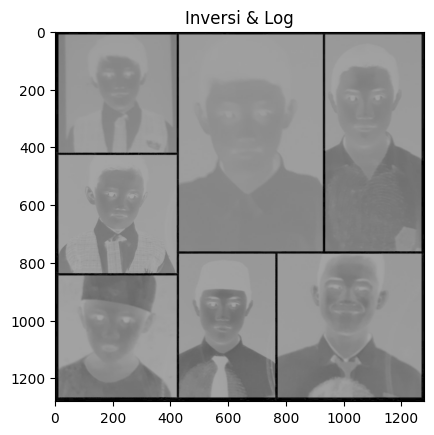

In [13]:
inlog(30)                   #Mengaplikasikan fungsi inlog dengan parameter c = 30
plt.imshow(img_inlog)       #Menampilkan citra hasil inversi dan log
plt.title("Inversi & Log")  #Memberikan judul pada citra
plt.show()                  #Menampilkan citra

# Nth Power

Membuat variabel img_nthpower untuk menampung hasil

In [14]:
img_nthpower = np.zeros(img.shape, dtype=np.uint8) #Baris kode tersebut membuat array dengan nilai nol berukuran sama dengan citra `img` dan tipe data `uint8` menggunakan NumPy.

Mendefinisikan fungsi untuk nth power

In [15]:
def nthpower(c, y):
    # Menghitung persentase nilai c dan y
    thc = c / 100 
    thy = y / 100
    # Looping setiap pixel pada gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            # Mendapatkan nilai RGB dari setiap pixel
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            # Menghitung nilai gray sebagai rata-rata dari nilai RGB
            gray = (int(red) + int(green) + int(blue)) / 3
            # Menghitung nilai gray yang baru menggunakan fungsi nth power
            gray = int(thc * pow(gray, thy))
            # Memastikan nilai gray tidak melebihi 255 atau kurang dari 0
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
            # Memasukkan nilai gray ke dalam array img_nthpower
            img_nthpower[y][x] = (gray, gray, gray)

Menampilkan hasil

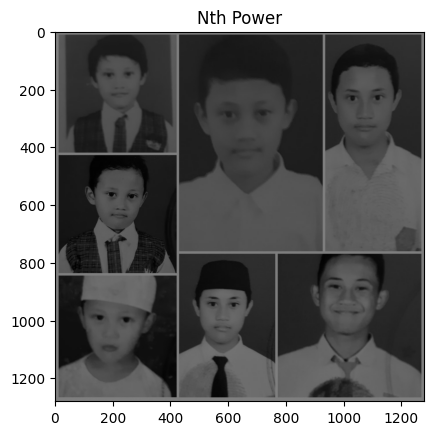

In [16]:
nthpower(50, 100) # melakukan fungsi nthpower dengan parameter c = 50 dan y = 100
plt.imshow(img_nthpower) # menampilkan gambar hasil proses nthpower
plt.title("Nth Power") # memberi judul pada gambar
plt.show() # menampilkan gambar yang sudah diberi judul

# Nth Root Power

Membuat variabel img_nthrootpower

In [17]:
img_nthrootpower = np.zeros(img.shape, dtype=np.uint8) #Baris kode tersebut membuat array dengan nilai nol berukuran sama dengan citra `img` dan tipe data `uint8` menggunakan NumPy.

Membuat fungsi untuk nth root power

In [18]:
def nthrootpower(c, y):
    # Menghitung persentase nilai c dan y
    thc = c / 100
    thy = y / 100
    
    # Looping setiap pixel pada gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            # Mendapatkan nilai RGB dari setiap pixel
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            
            # Menghitung nilai gray sebagai rata-rata dari nilai RGB
            gray = (int(red) + int(green) + int(blue)) / 3
            
            # Menghitung nilai gray yang baru menggunakan fungsi nth root power
            gray = int(thc * pow(gray, 1./thy))
            
            # Memastikan nilai gray tidak melebihi 255 atau kurang dari 0
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
                
            # Memasukkan nilai gray ke dalam array img_nthpower
            img_nthpower[y][x] = (gray, gray, gray)

Menampilkan hasil

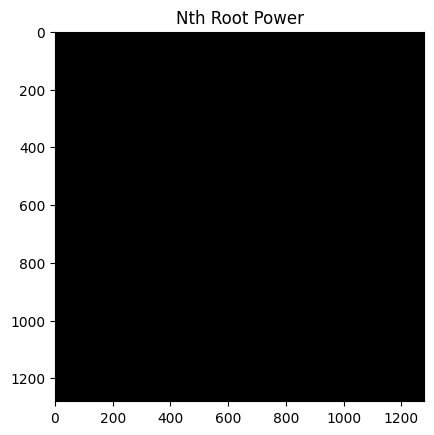

In [19]:
# melakukan fungsi nthrootpower dengan parameter c = 50 dan y = 100
nthrootpower(50, 100)

# menampilkan gambar hasil proses nthrootpower
plt.imshow(img_nthrootpower)

# memberi judul pada gambar
plt.title("Nth Root Power")

# menampilkan gambar yang sudah diberi judul
plt.show()